TASK-1

In [30]:
import pandas as pd

In [31]:
import matplotlib.pyplot as plt 
from sklearn.datasets import fetch_california_housing
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [32]:
house=fetch_california_housing()
df=pd.DataFrame(house.data,columns=house.feature_names)
df['Target']=house.target

In [33]:
X=df[['AveRooms']]
y=df['Target']

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [35]:
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

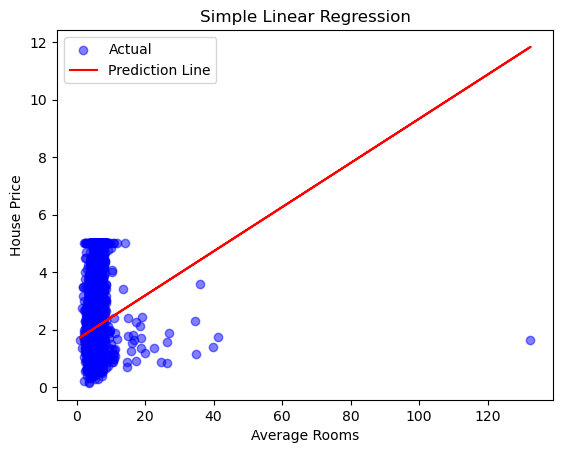

In [36]:
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label="Actual")
plt.plot(X_test, model.predict(X_test), color='red', label="Prediction Line")
plt.xlabel("Average Rooms")
plt.ylabel("House Price")
plt.title("Simple Linear Regression")
plt.legend()
plt.show()

TASK-2

In [37]:
from sklearn.metrics import mean_squared_error,r2_score

In [38]:
X=df[['MedInc','HouseAge','AveRooms','AveOccup']]
y=df['Target']

In [39]:
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [40]:
model=LinearRegression()
model.fit(X_train,y_train)
y_pred=model.predict(X_test)

In [41]:
print("R-squared:",r2_score(y_test,y_pred))
print("MSE:",mean_squared_error(y_test,y_pred))
print("RMSE:",mean_squared_error(y_test,y_pred)**0.5)



R-squared: 0.49828508595474374
MSE: 0.657451727882265
RMSE: 0.810833970602037


In [42]:
coefficients=pd.DataFrame(model.coef_,X.columns,columns=['Coefficient'])
print(coefficients)

          Coefficient
MedInc       0.445466
HouseAge     0.016904
AveRooms    -0.028381
AveOccup    -0.004144


TASK-3

In [43]:
from sklearn.preprocessing import StandardScaler

In [44]:
scaler=StandardScaler()
X_scaled=scaler.fit_transform(X)

In [45]:
X_train,X_test,y_train,y_test=train_test_split(X_scaled,y,test_size=0.2,random_state=42)
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

In [46]:
y_pred_scaled=model.predict(X_test)
print("After Scaling:")
print("R-squared:", r2_score(y_test, y_pred_scaled))
print("MSE:", mean_squared_error(y_test, y_pred_scaled))
print("RMSE:", mean_squared_error(y_test, y_pred_scaled)**0.5)

After Scaling:
R-squared: 0.49828508595474386
MSE: 0.6574517278822649
RMSE: 0.810833970602037


In [47]:
import seaborn as sb

In [48]:
features = df[['MedInc', 'HouseAge', 'AveRooms', 'AveOccup', 'Target']]
corr_matrix = features.corr()

<function matplotlib.pyplot.show(close=None, block=None)>

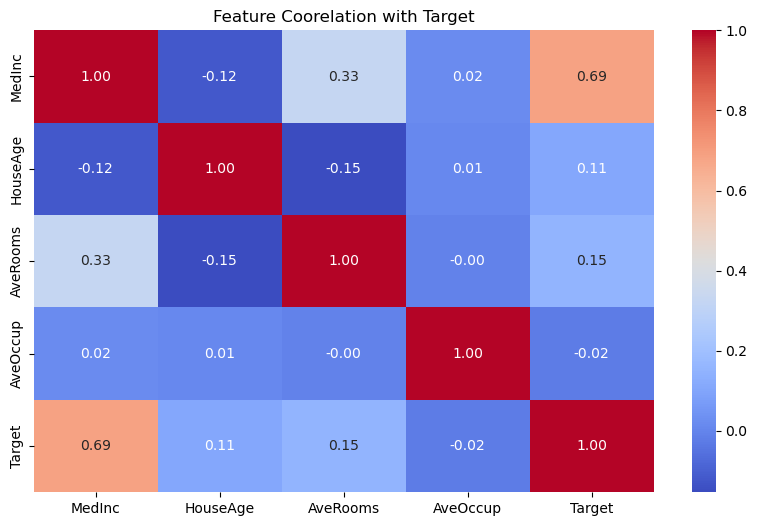

In [49]:
plt.figure(figsize=(10,6))
sb.heatmap(corr_matrix,annot=True,cmap='coolwarm',fmt=".2f")
plt.title("Feature Coorelation with Target")
plt.show

feature most strongly correlated  with Target:MedInc(positively),AveRooms(less so)